[菜鸟教程-numpy](https://www.runoob.com/numpy/numpy-tutorial.html)

## 导包

In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'  #默认为'last'
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import *
import time
import os
import sys
import random
from numpy import linalg
np.set_printoptions(threshold=np.inf, precision=2, suppress=True)

# 基本

# 线性代数

##### 创建矩阵

In [2]:
# a = np.array([])
np.random.seed(2020)
A = np.random.randint(0, 10, size=(3, 3))
A

array([[0, 8, 3],
       [6, 3, 3],
       [7, 8, 0]])

## 行列式
* det()

In [83]:
A = np.array([3,-2,2,1]).reshape(2,2)
linalg.det(A)

6.999999999999999

## 逆矩阵  
* inv()

In [3]:
A_1 = linalg.inv(A)
A_1
A@A_1
A_1@A

array([[-0.1 ,  0.1 ,  0.06],
       [ 0.08, -0.08,  0.07],
       [ 0.11,  0.22, -0.19]])

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0.,  0.,  1.]])

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0.,  0.,  1.]])

## 广义逆矩阵
* pinv()

In [82]:
A = np.mat("4 11 14;8 7 -2")
# 使用pinv函数计算广义逆矩阵
pseudoinv = linalg.pinv(A)
pseudoinv
A.shape
pseudoinv.shape
A@pseudoinv
pseudoinv@A

matrix([[-0.01,  0.07],
        [ 0.02,  0.04],
        [ 0.06, -0.06]])

(2, 3)

(3, 2)

matrix([[1., 0.],
        [0., 1.]])

matrix([[ 0.56,  0.44, -0.22],
        [ 0.44,  0.56,  0.22],
        [-0.22,  0.22,  0.89]])

In [74]:
help(linalg.pinv)

Help on function pinv in module numpy.linalg:

pinv(a, rcond=1e-15)
    Compute the (Moore-Penrose) pseudo-inverse of a matrix.
    
    Calculate the generalized inverse of a matrix using its
    singular-value decomposition (SVD) and including all
    *large* singular values.
    
    .. versionchanged:: 1.14
       Can now operate on stacks of matrices
    
    Parameters
    ----------
    a : (..., M, N) array_like
        Matrix or stack of matrices to be pseudo-inverted.
    rcond : (...) array_like of float
        Cutoff for small singular values.
        Singular values smaller (in modulus) than
        `rcond` * largest_singular_value (again, in modulus)
        are set to zero. Broadcasts against the stack of matrices
    
    Returns
    -------
    B : (..., N, M) ndarray
        The pseudo-inverse of `a`. If `a` is a `matrix` instance, then so
        is `B`.
    
    Raises
    ------
    LinAlgError
        If the SVD computation does not converge.
    
    Notes
    -

## 解线性方程

* solve()

In [8]:
B = np.array([1, -2, 1, 0, 2, -8, -4, 5, 9]).reshape(3, 3)
b = np.array([0, 8, -9])
# 调用solve函数求解线性方程
C = np.linalg.solve(B, b)
C

array([29., 16.,  3.])

## 特征值和特征向量
* eigvals() &nbsp;只返回特征值
* eig() &nbsp; 返回特征值和特征向量

In [35]:
# A = np.array([3, -1, -1, 3]).reshape(2, 2)
# A = np.array([3, -2, 1, 0]).reshape(2, 2)
A = np.array([-1,1,0,-4,3,0,1,0,2]).reshape(3, 3)
A
eigenvalues_ = linalg.eigvals(A)
eigenvalues, eigenvectors = linalg.eig(A)
eigenvalues_
eigenvalues
eigenvalues = np.diag(eigenvalues) # 化对角阵
eigenvalues
eigenvectors # 列向量
"***"
# 验证，注意顺序
A@eigenvectors
eigenvectors@eigenvalues
# for i in eigenvalues_:
#     i*eigenvectors.T

array([[-1,  1,  0],
       [-4,  3,  0],
       [ 1,  0,  2]])

array([2., 1., 1.])

array([2., 1., 1.])

array([[2., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

array([[ 0.  ,  0.41,  0.41],
       [ 0.  ,  0.82,  0.82],
       [ 1.  , -0.41, -0.41]])

'***'

array([[ 0.  ,  0.41,  0.41],
       [ 0.  ,  0.82,  0.82],
       [ 2.  , -0.41, -0.41]])

array([[ 0.  ,  0.41,  0.41],
       [ 0.  ,  0.82,  0.82],
       [ 2.  , -0.41, -0.41]])

## 奇异值分解

* 函数：np.linalg.svd(a,full_matrices=1,compute_uv=1)。  
* 参数：a是一个形如(M,N)矩阵full_matrices的取值是为0或者1，默认值为1，这时u的大小为(M,M)，v的大小为(N,N) 。否则u的大小为(M,K)，v的大小为(K,N) ，K=min(M,N)。compute_uv的取值是为0或者1，默认值为1，表示计算u,s,v。为0的时候只计算s。  
* 返回值：总共有三个返回值u,s,v  
    u大小为(M,M)，s大小为(M,N)，v大小为(N,N)。

<font color=blue>
关于奇异值的解释： <br> 
　　对于方阵而言$A=Q\sum Q^{-1}$  <br>
&emsp;&emsp;其中的$\sum$就是特征向量。但是对于不是方阵的矩阵而言就没有特征向量。 <br>  
&emsp;&emsp;非方阵的矩阵可以用奇异值分解来描述这个矩阵。A=$U\sum V^T$。其中U叫做左奇异值，$\sum$叫做奇异值，V叫做右奇异值。因为只有对角线的数不为0，并且数值是从大到小排列，所以一般只取r个，r的值越接近A的列数，那么三个矩阵的乘法得到的矩阵越接近A。   <br>
&emsp;&emsp;因为三个矩阵的面积之和远远小于原矩阵A，所以当我们向压缩空间表达A的时候，可以使用这三个矩阵。 <br>  
&emsp;&emsp;当A不是矩阵的时候，把A转置变为$A^T$。并且$A^T v=\lambda v$。其中的$v$就是右奇异值。$\partial = \sqrt{\lambda}$，这里的$\partial$就是上面的奇异值。$u=\frac{Av}{\partial}$，这里的u就是上面的左奇异值。 <br>
</font>

In [71]:
A = np.array([4, 11, 14, 8, 7, -2]).reshape(2,-1)
U,Sigma,V = np.linalg.svd(A,full_matrices=1)
A
U
Sigma = np.diag(Sigma)
Sigma
V
"***"

# U@Sigma
# U@Sigma@V
U[:,0]**2+U[:,1]**2
U[0,:]**2+U[1,:]**2
V[:,0]**2+V[:,1]**2+V[:,2]**2

# V[0,:]**2+V[1,:]**2+V[2,:]**2
# V[0,:]**2+V[1,:]**2
V@V.T

array([[ 4, 11, 14],
       [ 8,  7, -2]])

array([[-0.95, -0.32],
       [-0.32,  0.95]])

array([[18.97,  0.  ],
       [ 0.  ,  9.49]])

array([[-0.33, -0.67, -0.67],
       [ 0.67,  0.33, -0.67],
       [-0.67,  0.67, -0.33]])

'***'

array([1., 1.])

array([1., 1.])

array([1., 1., 1.])

array([[ 1., -0., -0.],
       [-0.,  1., -0.],
       [-0., -0.,  1.]])

In [72]:
data = np.mat([[1,2,3],[4,5,6]])
U,sigma,VT = np.linalg.svd(data)
U #[[-0.3863177  -0.92236578] [-0.92236578  0.3863177 ]]
sigma#[9.508032   0.77286964]
VT#[[-0.42866713 -0.56630692 -0.7039467 ] [ 0.80596391  0.11238241 -0.58119908] [ 0.40824829 -0.81649658  0.40824829]]


matrix([[-0.39, -0.92],
        [-0.92,  0.39]])

array([9.51, 0.77])

matrix([[-0.43, -0.57, -0.7 ],
        [ 0.81,  0.11, -0.58],
        [ 0.41, -0.82,  0.41]])

Help on function svd in module numpy.linalg:

svd(a, full_matrices=True, compute_uv=True)
    Singular Value Decomposition.
    
    When `a` is a 2D array, it is factorized as ``u @ np.diag(s) @ vh
    = (u * s) @ vh``, where `u` and `vh` are 2D unitary arrays and `s` is a 1D
    array of `a`'s singular values. When `a` is higher-dimensional, SVD is
    applied in stacked mode as explained below.
    
    Parameters
    ----------
    a : (..., M, N) array_like
        A real or complex array with ``a.ndim >= 2``.
    full_matrices : bool, optional
        If True (default), `u` and `vh` have the shapes ``(..., M, M)`` and
        ``(..., N, N)``, respectively.  Otherwise, the shapes are
        ``(..., M, K)`` and ``(..., K, N)``, respectively, where
        ``K = min(M, N)``.
    compute_uv : bool, optional
        Whether or not to compute `u` and `vh` in addition to `s`.  True
        by default.
    
    Returns
    -------
    u : { (..., M, M), (..., M, K) } array
        Unita

# API

## 属性  
1. nbytes(字节大小)

### nbytes

In [22]:
a = np.arange(100)
a.nbytes

400

## 方法

### genfromtxt

In [19]:
data = np.genfromtxt('./datas/genfromtxt_01.txt',encoding='utf-8',dtype=np.dtype(str))
data

array('1,2,3,4,5', dtype='<U9')

In [21]:
data = np.genfromtxt('./datas/genfromtxt_01.txt',
                     delimiter=',',
                     encoding='utf-8',
                     dtype=np.dtype(float),
                     replace_space='')
data
data.nbytes # 字节大小

array([1., 2., 3., 4., 5.])

40

In [5]:
help(np.genfromtxt)

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+,-./:;<=>?@[\\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strings. The string

[[Python图像处理] 二十二.Python图像傅里叶变换原理及实现](https://blog.csdn.net/Eastmount/article/details/89474405)

### eimsum

[NumPy中einsum的基本介绍](https://cloud.tencent.com/developer/article/1369762)  
[einsum满足你一切需要：深度学习中的爱因斯坦求和约定](https://zhuanlan.zhihu.com/p/44954540)  


* 一维数组  

Call signature|Numpy equivalent|Description
:---:|:---:|:---:
('i',A)|A|返回数组A
('i->',A)|sum(A)|返回数组A的值的总和
('i,i->i',A,B)|A*B|数组A和数组B的元素依次相乘
('i,i',A,B)|inner(A,B)|A和B的点积(内积)
('i,j->ij',A,B)|outer(A,B)|A和B的叉积(外积)  

* 二维数组  

Call signature|Numpy equivalent|Description
:---:|:---:|:---:
('ij',A)|A|数组A
('ji',A)|A.T|数组A的转置
('ii->i',A)|diag(A)|数组A的主对角线
('ii',A)|trace(A)|数组A的主对角线的和
('ij->',A)|sum(A)|数组A的值相加
('ij->j',A)|sum(A)|数组A的列求和
('ij->i',A)|sum(A)|数组A的行求和
('ij,ij->ij',A,B)|A*B|数组A和B逐元素相乘
('ij,ji->ij',A,B)|A*B.T|数组A和B的转置逐元素相乘
('ij,jk',A,B)|dot(A,B)|数组A的与B的矩阵乘法
('ij,kj->ik',A,B)|inner(A,B)|数组A的与B的矩阵乘法
('ij,kj->ikj',A,B)|A\[:,None\]*B|数组A的每一行乘以B
('ij,kl->ijkl',A,B)|A\[:,:,None,None\]*B|数组A的每个值乘以B


#### 一维数组

In [20]:
a = np.array([0,1,2])
b = np.array([1,2,3])
c = np.arange(9).reshape(3,3)
np.einsum('i->',a)
np.einsum('i,i->i',a,b)
np.einsum('i,i',a,b)
np.einsum('i,j->ij',a,b)
# np.einsum('i,jk->ijk',a,b)

3

array([0, 2, 6])

8

array([[0, 0, 0],
       [1, 2, 3],
       [2, 4, 6]])

#### 二维数组

In [29]:
a = np.arange(9.).reshape(3,3)
b = np.arange(9.).reshape(3,3)
a
b
np.einsum('ij->',a)
np.einsum('ij->j',a)
np.einsum('ij->i',a)

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

36.0

array([ 9., 12., 15.])

array([ 3., 12., 21.])

In [32]:
np.einsum('ij,jk',a,b)
np.dot(a,b)
np.einsum('ij,ij',a,b)
np.inner(a,b)

array([[ 15.,  18.,  21.],
       [ 42.,  54.,  66.],
       [ 69.,  90., 111.]])

array([[ 15.,  18.,  21.],
       [ 42.,  54.,  66.],
       [ 69.,  90., 111.]])

204.0

array([[  5.,  14.,  23.],
       [ 14.,  50.,  86.],
       [ 23.,  86., 149.]])

In [52]:
a
# b
np.einsum('ij,kj->ikj',a,b)
a[:,None].shape
a[:,None]*b


array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

array([[[ 0.,  1.,  4.],
        [ 0.,  4., 10.],
        [ 0.,  7., 16.]],

       [[ 0.,  4., 10.],
        [ 9., 16., 25.],
        [18., 28., 40.]],

       [[ 0.,  7., 16.],
        [18., 28., 40.],
        [36., 49., 64.]]])

(3, 1, 3)

array([[[ 0.,  1.,  4.],
        [ 0.,  4., 10.],
        [ 0.,  7., 16.]],

       [[ 0.,  4., 10.],
        [ 9., 16., 25.],
        [18., 28., 40.]],

       [[ 0.,  7., 16.],
        [18., 28., 40.],
        [36., 49., 64.]]])

In [60]:
# a[:,:,None,None]
# a[:,:,None,None]*b
np.einsum('ij,kl->ijkl',a,b).shape

(3, 3, 3, 3)

In [58]:
A = np.arange(12.).reshape(3,4)
B = np.arange(9.).reshape(3,3)
A.T
B
np.einsum('ij,ik->ijk',A,B)
# np.einsum('ij,kl->ijkl',a,b)

array([[ 0.,  4.,  8.],
       [ 1.,  5.,  9.],
       [ 2.,  6., 10.],
       [ 3.,  7., 11.]])

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

array([[[ 0.,  0.,  0.],
        [ 0.,  1.,  2.],
        [ 0.,  2.,  4.],
        [ 0.,  3.,  6.]],

       [[12., 16., 20.],
        [15., 20., 25.],
        [18., 24., 30.],
        [21., 28., 35.]],

       [[48., 56., 64.],
        [54., 63., 72.],
        [60., 70., 80.],
        [66., 77., 88.]]])

## np.poly1d


In [21]:
p = np.poly1d([1, 2, 3])
a = np.array([1,2,3])
p(a)
1+2*a+3*a**2
3+2*a+a**2 # 结果
p.c # array([1, 2, 3])
p.order # 2
p.r # array([-1.+1.41j, -1.-1.41j])
p**2

array([ 6, 11, 18])

array([ 6, 17, 34])

array([ 6, 11, 18])

array([1, 2, 3])

2

array([-1.+1.41j, -1.-1.41j])

poly1d([ 1,  4, 10, 12,  9])

In [3]:
np.random.rand(1)

array([0.63])

In [19]:
help(np.poly1d)

Help on class poly1d in module numpy:

class poly1d(builtins.object)
 |  poly1d(c_or_r, r=False, variable=None)
 |  
 |  A one-dimensional polynomial class.
 |  
 |  A convenience class, used to encapsulate "natural" operations on
 |  polynomials so that said operations may take on their customary
 |  form in code (see Examples).
 |  
 |  Parameters
 |  ----------
 |  c_or_r : array_like
 |      The polynomial's coefficients, in decreasing powers, or if
 |      the value of the second parameter is True, the polynomial's
 |      roots (values where the polynomial evaluates to 0).  For example,
 |      ``poly1d([1, 2, 3])`` returns an object that represents
 |      :math:`x^2 + 2x + 3`, whereas ``poly1d([1, 2, 3], True)`` returns
 |      one that represents :math:`(x-1)(x-2)(x-3) = x^3 - 6x^2 + 11x -6`.
 |  r : bool, optional
 |      If True, `c_or_r` specifies the polynomial's roots; the default
 |      is False.
 |  variable : str, optional
 |      Changes the variable used when printi

# 傅里叶变换  

[python做傅里叶变换](https://www.cnblogs.com/LXP-Never/p/11558302.html)

(1000,)

(1000,)
complex128
(-2.1458390619955026e-12+0j)


D:\MySoft\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Frequency Domain')

Text(0.5, 0, 'Frequency')

Text(0, 0.5, 'Power')

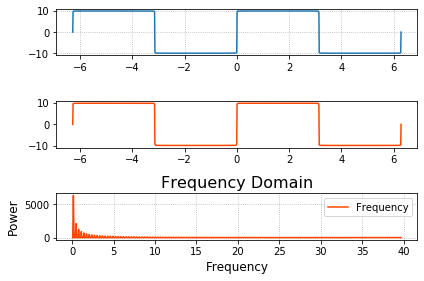

In [13]:
import numpy.fft as fft

x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

n = 1000
y = np.zeros(x.size)
y.shape
for i in range(1, n + 1):
    y += 4 * np.pi / (2 * i - 1) * np.sin((2 * i - 1) * x)
# y
complex_array = fft.fft(y)
# complex_array
print(complex_array.shape)  # (1000,) 
print(complex_array.dtype)  # complex128 
print(complex_array[0])  # (-2.1458390619955026e-12+0j)
y_new = fft.ifft(complex_array)
# y - y_new
plt.subplot(311)
plt.grid(linestyle=':')
plt.plot(x, y, label='y')  # y是1000个相加后的正弦序列
plt.subplot(312)
plt.plot(x, y_new, label='y_new', color='orangered')  # y是ifft变换后的序列

# 得到分解波的频率序列
freqs = fft.fftfreq(x.size, x[1] - x[0])
# freqs
# 复数的模为信号的振幅（能量大小）
complex_array = fft.fft(y)
pows = np.abs(complex_array)

plt.subplot(313)
plt.title('Frequency Domain', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.tick_params(labelsize=10)
plt.grid(linestyle=':')
plt.plot(freqs[freqs > 0], pows[freqs > 0], c='orangered', label='Frequency')
plt.legend()
plt.tight_layout()
plt.show()


# End

In [3]:
np.log(2.71828)
np.log2(2)
np.log10(10)


0.999999327347282

1.0

1.0

In [7]:
np.log(5)/np.log(3)
np.log2(5)/np.log2(3)

1.4649735207179269

1.464973520717927